![](images/model-training-and-tuning.png)

# Background

In this notebook we'll train a [Logistic Regression model](https://en.wikipedia.org/wiki/Logistic_regression) to distinguish between spam data (food reviews) and legitimate data (Austen). 

We begin by loading in the feature vectors which we generated in either [the simple summaries feature extraction notebook](03-feature-engineering-summaries.ipynb) or [the TF-IDF feature extraction notebook](03-feature-engineering-tfidf.ipynb). 

In [28]:
import pandas as pd
feats = pd.read_parquet("data/features.parquet")

The first 2 columns of the `feats` matrix are the index, and label. The remaining columns are the feature vectors. 

We begin by splitting the data into 2 sets: 

* `train` - a set of feature vectors which will be used to train the model
* `test` - a set of feature vectors which will be used to evaluate the model we trained

In [29]:
from sklearn import model_selection
train, test = model_selection.train_test_split(feats, random_state=43)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 4000)

In [32]:
#training the model
import time

start = time.time()
model.fit(X=train.iloc[:,2:train.shape[1]], y=train["label"])
end = time.time()
print(end - start)


2.341392755508423
2.341392755508423
2.341392755508423


With the model trained we can use it to make predictions. We apply the model to the `test` set, then compare the predicted classification of spam or legitimate to the truth.  

In [33]:
predictions = model.predict(test.iloc[:,2:test.shape[1]])

In [34]:
predictions

array(['legitimate', 'spam', 'legitimate', ..., 'spam', 'legitimate',
       'legitimate'], dtype=object)

array(['legitimate', 'spam', 'legitimate', ..., 'spam', 'legitimate',
       'legitimate'], dtype=object)

array(['legitimate', 'spam', 'legitimate', ..., 'spam', 'legitimate',
       'legitimate'], dtype=object)

We use a binary confusion matrix to visualise the accuracy of the model. 

In [35]:
from mlworkflows import plot

In [36]:
df, chart = plot.binary_confusion_matrix(test["label"], predictions)

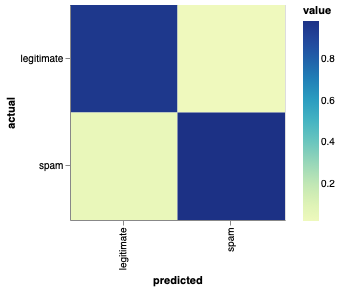

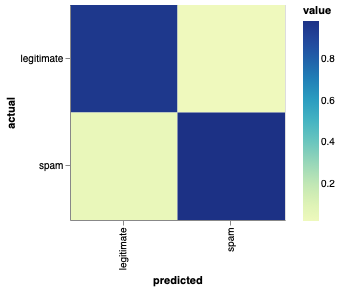

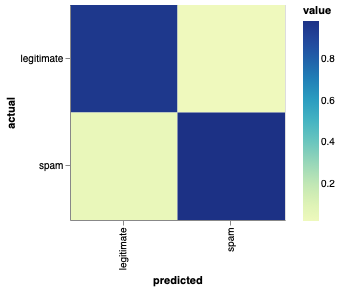

In [37]:
chart

We can look at the raw numbers, and proportions of correctly and incorrectly classified items: 

In [38]:
df

,actual,predicted,raw_count,value
0,legitimate,legitimate,4747,0.948641
1,spam,legitimate,257,0.051359
2,legitimate,spam,114,0.022818
3,spam,spam,4882,0.977182


,actual,predicted,raw_count,value
0,legitimate,legitimate,4747,0.948641
1,spam,legitimate,257,0.051359
2,legitimate,spam,114,0.022818
3,spam,spam,4882,0.977182


,actual,predicted,raw_count,value
0,legitimate,legitimate,4747,0.948641
1,spam,legitimate,257,0.051359
2,legitimate,spam,114,0.022818
3,spam,spam,4882,0.977182


We can also look at the precision, recall and f1-score for the model. 

In [39]:
from sklearn.metrics import classification_report
print(classification_report(test.label.values, predictions))

             precision    recall  f1-score   support

 legitimate       0.98      0.95      0.96      5004
       spam       0.95      0.98      0.96      4996

avg / total       0.96      0.96      0.96     10000

             precision    recall  f1-score   support

 legitimate       0.98      0.95      0.96      5004
       spam       0.95      0.98      0.96      4996

avg / total       0.96      0.96      0.96     10000

             precision    recall  f1-score   support

 legitimate       0.98      0.95      0.96      5004
       spam       0.95      0.98      0.96      4996

avg / total       0.96      0.96      0.96     10000



We want to save the model so that we can use it outside of this notebook.

In [40]:
from mlworkflows import util
util.serialize_to(model, "model.sav")